<a href="https://colab.research.google.com/github/mnwato/captcha-recognition/blob/master/sheypoor/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
use_colab = True

# labels
!gdown --i 1V_mFYCQk2tbvi9Nc6WXQrllQWJV0gOzg
# digits
!gdown --i 141HrMeZvari7mCBmqyneAL4QI1qwz2qI
# chaptcha images
!gdown --i 1egp2ncrof0wuG-BQbVwSAWK64bB4zl1b

!unzip /content/dataset.zip
!rm /content/dataset.zip
!unzip /content/digits-dataset.zip
!rm /content/digits-dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1V_mFYCQk2tbvi9Nc6WXQrllQWJV0gOzg
To: /content/labels.txt
100% 6.39k/6.39k [00:00<00:00, 10.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=141HrMeZvari7mCBmqyneAL4QI1qwz2qI
To: /content/digits-dataset.zip
100% 2.25M/2.25M [00:00<00:00, 45.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1egp2ncrof0wuG-BQbVwSAWK64bB4zl1b
To: /content/dataset.zip
100% 4.59M/4.59M [00:00<00:00, 75.4MB/s]
Archive:  /content/dataset.zip
   creating: dataset/
  inflating: dataset/captcha1.jpg    
  inflating: dataset/captcha10.jpg   
  inflating: dataset/captcha100.jpg  
  inflating: dataset/captcha101.jpg  
  inflating: dataset/captcha102.jpg  
  inflating: dataset/captcha103.jpg  
  inflating: dataset/captcha104.jpg  
  inflating: dataset/captcha105.jpg  
  inflating: dataset/captcha106.jpg  
  inflating: dataset/captcha107.jpg  
  inflating: dataset/captcha108.jpg  
  inflating: dataset/captcha109.jpg  
  inflating: dataset/captcha1

# Getting golestan captcha

In [ ]:
import requests
import base64
import numpy as np
import time

url = 'https://edu.znu.ac.ir/Forms/AuthenticateUser/captcha.aspx?0.40381493127445034&x859=386&x763=844'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36"}


for i in range(944,1000):
    x = requests.get(url, headers=headers, stream=True)

    a = x.content

    with open(f'./dataset-golestan/captcha{i}.jpg','wb') as f:
        f.write(a)
    delay = np.random.randint(2)
    time.sleep(10)

# Getting captcha from sheypoor website

In [ ]:
import requests
import base64
import numpy as np
import time

url = 'https://www.sheypoor.com/api/web/captcha/refresh'
headers = {
    "authority": "www.sheypoor.com",
    "method": "POST",
    "path": "/api/web/captcha/refresh",
    "scheme": "https",
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9",
    "content-length": "38",
    "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
    "cookie": "plog=False; ts=b536dc923761e246fa3d552db50df071; track_id=e2e687919ce5e3f3a9a85f682145651c; AMP_TOKEN=%24NOT_FOUND; _ga=GA1.2.527994953.1644523644; _gid=GA1.2.672309292.1644523644; _gat=1",
    "origin": "https://www.sheypoor.com",
    # "referer": "https://www.sheypoor.com/%D9%81%D8%B1%D8%B2-%D8%A8%D8%B2%D8%B1%DA%AF-%D8%A7%D9%87%D9%86%DA%AF%D8%B1%DB%8C-%D8%B3%D9%86%DA%AF%D8%A8%D8%B1%DB%8C-%D8%AF%DB%8C%D9%85%D8%B1-%D8%AF%D8%A7%D8%B1-%D8%A8%D8%A7%D8%B3-402738844.html",
    "sec-ch-ua": '"Not A;Brand";v="99", "Chromium";v="98", "Google Chrome";v="98"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors", 
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}
data = {"token": "103159f5a73c63cacc4c9d8680d45325"}

for i in range(500,1000):
    x = requests.post(url, headers=headers, data=data, stream=True)

    a = x.json()['data']['image']
    a = a.encode('utf-8')

    with open(f'./dataset/captcha{i}.jpg','wb') as f:
        f.write(base64.decodebytes(a))
    delay = np.random.randint(5)
    # time.sleep(delay)

# preprocessing images

In [3]:
# LOADING IMAGES

import cv2
import os
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def load_images():
    root_path = os.getcwd()
    dataset_path = os.path.join(root_path, 'dataset')
    # dataset_path = os.path.join(root_path, 'dataset-golestan')
    images = [img for img in os.listdir(dataset_path)]
    return images, dataset_path

captcha13.jpg


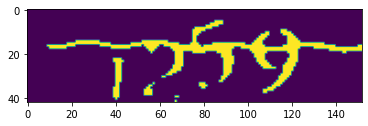

In [4]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# 501
# PREPROCESS LOADED IMAGES
def preprocessing(image, dataset_path):
    print(image)
    org_image = cv2.imread(os.path.join(dataset_path, image))
    image_gray = cv2.cvtColor(org_image, cv2.COLOR_RGB2GRAY)
    # crop_image = image_gray[:int(image_gray.shape[0]*0.9), :]
    crop_image = image_gray
    image_gray2 = cv2.blur(crop_image, (4,4))
    image_sharp = cv2.GaussianBlur(image_gray2, (0,0), sigmaX=1, sigmaY=20, borderType=cv2.BORDER_DEFAULT)
    # image_sharp = cv2.addWeighted(image_gray2, 2, image_sharp, -0.05, 0)
    image_sharp = cv2.addWeighted(image_gray2, 1.7, image_sharp, -0.01, 0)

    if image_sharp[0,0] and image_sharp[-1,-1] > 100:
        # print(image_sharp[0,0], image_sharp[-1,-1])
        image_sharp_not = cv2.bitwise_not(image_sharp)
        ret, image_zeroone = cv2.threshold(image_sharp_not, 20, 255, cv2.THRESH_BINARY)
        return image_zeroone, org_image
    else:
        # print('dark bg', end=' | ')
        # print(image_sharp[0,0], image_sharp[-1,-1])
        return None, org_image


images, dataset_path = load_images()
preprocessed_image, org_image = preprocessing('captcha13.jpg', dataset_path)
if type(preprocessed_image) == np.ndarray:
    if np.max(np.histogram(preprocessed_image)[0]) < 6300:
        plt.imshow(preprocessed_image)
        plt.show()

In [4]:
# cv2.imshow('name', preprocessed_image)
# # cv2.imshow('name', image_gray_not)
# cv2.waitKey(0)
# # closing all open windows 
# cv2.destroyAllWindows()

# Detection

In [5]:
from sklearn.cluster import KMeans
import numpy as np

In [6]:
# GET WHITE PIXELS CORDINATION
def get_whitePX_cord(image):
    points = []
    k=0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if int(image[i,j]) == 255:
                points.append([i,j])
                k = k+1
    return points

whitePX_cord = get_whitePX_cord(preprocessed_image)

In [7]:
# FIND DIGIT'S CENTER CORDINATION VIA KMEANS
def get_digit_center_cord(cord):
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=20, init='k-means++', max_iter=int(1e40)).fit(cord)
    # kmeans.inertia_
    cluster_centers = kmeans.cluster_centers_
    return np.sort(cluster_centers, axis=0)

digits_center = get_digit_center_cord(whitePX_cord)

In [16]:
# PLOT IMAGE AND DRAW RECTANGULAR BOX AROUND DIGITS 
def display_results(digits_center):
    x = digits_center[:,0]
    y = digits_center[:,1]
    plt.imshow(preprocessed_image)
    plt.scatter(y,x, color='red')

    for center in digits_center:
        plt.gca().add_patch(Rectangle((center[1]-15,center[0]-15),30,30,linewidth=1,edgecolor='r',facecolor='none'))

display_results(digits_center)

# Extraxt separated number from each catpcha image

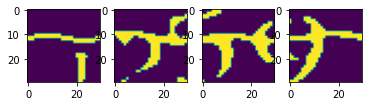

In [9]:
# EXTRACT DIGITS FROM AN IMAGE
def digits_extraction(digits_center, preprocessd_image):
    digits = []
    for center in np.round(digits_center):
        start_row = int(center[0]-15)
        start_col = int(center[1]-15)
        if start_row<0: start_row=0
        if start_col<0: start_col=0
        digit = preprocessd_image[start_row:start_row+30, start_col:start_col+30]
        digits.append(digit)
    return digits


extracted_digits = digits_extraction(digits_center, preprocessed_image)

for i, digit in enumerate(extracted_digits, 1):
    plt.subplot(1,4, i)
    plt.imshow(digit)

# GATHER ALL OF FUNCTION TOGETHER

In [ ]:
images, dataset_path = load_images()
# image = 'captcha137.jpg'
for image in images:
    preprocessed_image = preprocessing(image, dataset_path)[0]
    if type(preprocessed_image) == np.ndarray:
        if np.max(np.histogram(preprocessed_image)[0]) < 6300:
            whitePX_cord = get_whitePX_cord(preprocessed_image)
            digits_center = get_digit_center_cord(whitePX_cord)
            # display_results(digits_center)
            extracted_digits = digits_extraction(digits_center, preprocessed_image)
            # plt.show()
            for i, digit in enumerate(extracted_digits, 1):
                plt.subplot(1,4, i)
                # plt.imshow(digit)
                # plt.show()
                if digit.size == 900:
                  plt.imsave(f'./digits-dataset2/{image[:-4]}-{i}.jpg', digit)

# Convoloutional model

## Loading data

In [386]:
import pandas as pd

# LOAD LABELS DATA
with open('labels.txt') as f:
    labels = f.readlines()
    labels = [x.rstrip('\n') for x in labels]

labels_dict = {}
for elem in labels:
  elem = elem.split()
  if elem[0] not in labels_dict:
    labels_dict.update({elem[0]: int(elem[1])})


# LOAD DIGITS
X = []
root_path = os.path.join(os.getcwd(), 'digits-dataset2')
images_name = os.listdir(root_path)
images_path = [os.path.join(os.getcwd(), 'digits-dataset2', img) for img in images_name]

df = pd.DataFrame(columns=['name','digit','image'])
# df['name'] = list(labels_dict.keys())
# df['digit'] = list(labels_dict.values())

digits = []
names = []
for name in images_name:
  if name[:-4] in labels_dict:
    digits.append(labels_dict[name[:-4]])
    names.append(name[:-4])
    index = images_name.index(name)
    path = images_path[index]

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    if image.size == 900:
      X.append(image)

df['name'] = names
df['digit'] = digits
df['image'] = X
X = np.array(X)

In [453]:
a = []
for i in range(500):
  if i%2 == 0:
    a.append([i,1])
  else:
    a.append([i,0])

a = np.array(a)

x = a[:,0].reshape((len(a),1))
y = a[:,1]

In [481]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

model = DecisionTreeClassifier()
# model.fit(x, y)
model.fit(xtrain2, ytrain2)

DecisionTreeClassifier()

In [480]:
test = np.array([22,23,3,1,0,2,4,100])
test = np.reshape(test, (len(test),1))
model.predict(test)

array([1, 0, 0, 0, 1, 1, 1, 1])

In [482]:
ypred = model.predict(xtest2)
print(ytest2)
print(ypred)

print(classification_report(ytest2, ypred))

[0 8 0 4 6 9 2 4 1 9]
[2 2 2 2 2 2 2 2 2 2]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.10      1.00      0.18         1
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2

    accuracy                           0.10        10
   macro avg       0.01      0.14      0.03        10
weighted avg       0.01      0.10      0.02        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


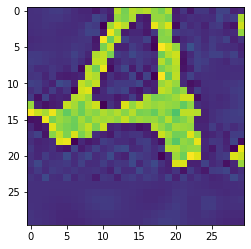

In [301]:
plt.imshow(X[-10])

# Colvoloutional Model

In [323]:
import tensorflow as tf
from keras.datasets import mnist
from keras import models
from keras import layers
import keras


(xtrain_28, ytrain_28), (xtest_28, ytest_28) = mnist.load_data()

# plt.imshow(xtrain[0], cmap=plt.cm.binary)

xtrain = np.reshape(xtrain_28, (xtrain_28.shape[0], 28*28))
xtrain = xtrain.astype('float32') / 255

xtest = np.reshape(xtest_28, (xtest_28.shape[0], 28*28))
xtest = xtest.astype('float32') / 255


In [324]:
input_layer = keras.Input(shape=(28*28,))
x = layers.Dense(512, activation='relu', input_shape=(28 * 28,))(input_layer)
x = layers.Dense(256, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=input_layer, outputs=out)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_61 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_130 (Dense)           (None, 512)               401920    
                                                                 
 dense_131 (Dense)           (None, 256)               131328    
                                                                 
 dense_132 (Dense)           (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [325]:
history = model.fit(
                xtrain,
                ytrain_28,
                # xtrain2,
                # ytrain2,
                verbose=1,
                epochs=3,
                # epochs=15,
                batch_size=128,
                # batch_size=2,
                validation_split=0.1,
            )

Epoch 1/3
422/422 [==============================] - 10s 22ms/step - loss: 0.2422 - accuracy: 0.9254 - val_loss: 0.1072 - val_accuracy: 0.9652
Epoch 2/3
422/422 [==============================] - 8s 18ms/step - loss: 0.0875 - accuracy: 0.9729 - val_loss: 0.0750 - val_accuracy: 0.9787
Epoch 3/3
422/422 [==============================] - 8s 19ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0856 - val_accuracy: 0.9733


In [383]:
# transfer learning
from tensorflow import keras
# model.layers[1].trainable = False
# model.layers[2].trainable = False


input_layer2 = keras.Input(shape=(28*28,))
transfered_layer = (model.layers[1])(input_layer2)
transfered_layer = (model.layers[2])(transfered_layer)
added_layer = layers.Dense(128, activation='relu')(transfered_layer)
added_layer = layers.Dense(10, activation='relu')(added_layer)
out2 = layers.Dense(10, activation='relu')(added_layer)
new_model = keras.Model(inputs=input_layer2, outputs=out2)

opt = tf.keras.optimizers.Adam(learning_rate=0.1)
new_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy',)

new_model.layers[1].trainable = False
new_model.layers[2].trainable = False

new_model.summary()

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_79 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_130 (Dense)           (None, 512)               401920    
                                                                 
 dense_131 (Dense)           (None, 256)               131328    
                                                                 
 dense_184 (Dense)           (None, 128)               32896     
                                                                 
 dense_185 (Dense)           (None, 10)                1290      
                                                                 
 dense_186 (Dense)           (None, 10)                110       
                                                                 
Total params: 567,544
Trainable params: 34,296
Non-trainab

In [414]:
# new_X = X[:,1:-1,1:-1]
new_X = X

xtrain2 = np.reshape(new_X, (new_X.shape[0], 30*30))

# train
xtrain2 = xtrain2[:-10]
xtrain2 = xtrain2.astype('float')/255
ytrain2 = df.digit.values[:-10]
#test
xtest2 = xtrain2[-10:]
xtest2 = xtest2.astype('float')/255
ytest2 = df.digit.values[-10:]

xtrain2.shape, xtest2.shape

((500, 900), (10, 900))

In [ ]:
history = new_model.fit(
                    xtrain2,
                    ytrain2,
                    verbose=1,
                    epochs=20,
                    batch_size=2,
                    # validation_split=0.1,
                )

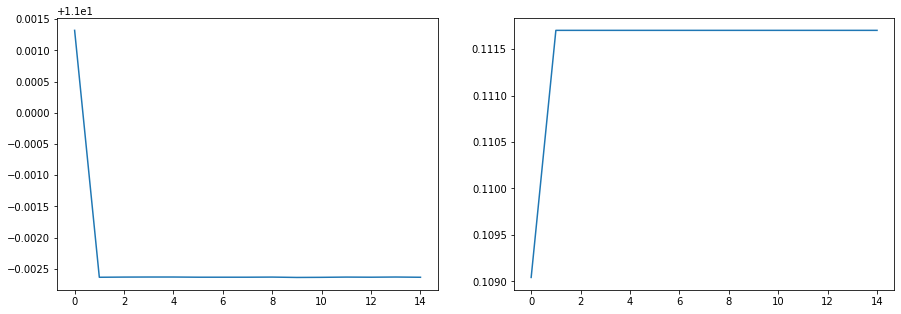

In [341]:
train_items = ['loss','val_loss']
val_items = ['accuracy','val_accuracy']

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history[train_items[0]])
# plt.plot(history.history[train_items[1]])

plt.subplot(1,2,2)
plt.plot(history.history[val_items[0]])
plt.plot(history.history[val_items[1]])

In [228]:
# TEST 'MNIST' TRAINED MODEL USING MNIST TEST DATA
ypred = model.predict(xtest[0:1])

ytest_28[0], np.argmax(ypred)

(7, 7)

In [344]:
# TEST 'MNIST' TRAINED MODEL USING EXTRACTED DIGITS
from sklearn.metrics import classification_report

ypred = new_model.predict(xtest2)

# ypred = model.predict(xtest)


# num_img = 10

# test_digit = df.image[0:num_img]
# test_digit = np.array([x[1:-1,1:-1] for x in test_digit])

# test_digit = np.reshape(test_digit, (test_digit.shape[0], 784))
# ypred = model.predict(test_digit)

ypred = [np.argmax(x) for x in ypred]
# print('core', [x for x in ytest2])
# print('pred', ypred)

# print(classification_report(ytest_28, ypred))
print(classification_report(ytest2, ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.10      1.00      0.18         1

    accuracy                           0.10        10
   macro avg       0.02      0.17      0.03        10
weighted avg       0.01      0.10      0.02        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


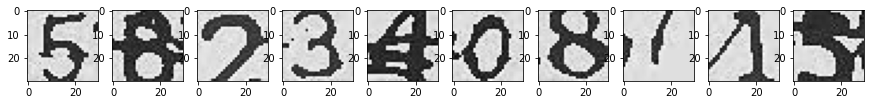

In [92]:
plt.figure(figsize=(15,5))
for i in range(1,num_img+1):
  plt.subplot(1,num_img,i)
  plt.imshow(df.image[i-1], cmap=plt.cm.binary)

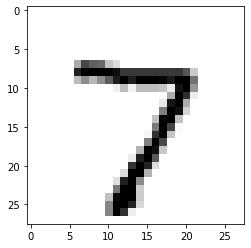

In [80]:
plt.imshow(xtest_28[0], cmap=plt.cm.binary)

In [300]:
ypred = model.predict(xtest)

a = [np.argmax(x) for x in ypred]
for i,j in zip(a, ytest):
  print(i, j)

3 1
9 9
4 6
7 8
4 3
5 0
6 7
3 6
4 9
2 7
